# Pandas

## Pandas Dataframe

Pandas is a python package for importing, inspecting, cleaning, aggregating, transforming, and visualizing data. You import pandas as:

```import pandas as pd```


## Creating a dataframe

Pandas introduces a new datatype, the DataFrame.

The dataframe is a two dimensional container that organizes data into rows (samples) and columns (features) much like a spreadsheet. 

We can create a dataframe using a dictionary. The keys of the dictionary will be the columns of the dataframe and the values will be the the row values. So, the values in our dictionary should be lists or numpy arrays.

For example, let's extend our earning dictionary from above. For each key, replace the value with the following lists:

 - month - ['Sept', 'Oct', 'Nov']
 - gross - [22000, 24500, 18000]
 - expenses - [16000, 16000, 8000]
 - net - (gross - expenses)

 Once we have the dict, we can create the dataframe using

 ```earnings_df = pd.DataFrame(earnings)```

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
earnings_dict = dict(
    month = ['Sept', 'Oct', 'Nov'],
    gross = [22000, 24500, 18000],
    expenses = [16000, 16000, 8000]
)

earnings_dict

{'month': ['Sept', 'Oct', 'Nov'],
 'gross': [22000, 24500, 18000],
 'expenses': [16000, 16000, 8000]}

We can convert the dictionary into a dataframe using ```pd.DataFrame()```. The keys become the column headers and the associated values become...the values.

A note of caution, to convert a dictionary into a dataframe, the value lists for each column must be the same length.

In [26]:
earnings_df = pd.DataFrame(earnings_dict)

And like a dictionary, we can append new columns on the fly.

In [27]:
earnings_df['net'] = earnings_df['gross']- earnings_df['expenses']

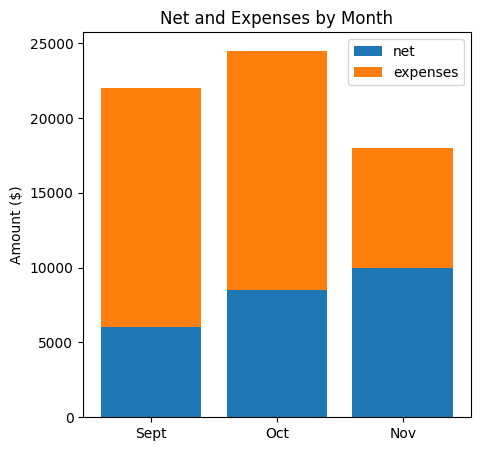

In [28]:
earnings_df['net'] = earnings_df['gross'] - earnings_df['expenses']

fig, ax = plt.subplots(1,1, figsize = (5,5))

ax.bar(earnings_df['month'], earnings_df['net'], label = 'net')
ax.bar(earnings_df['month'], earnings_df['expenses'],
              bottom = earnings_df['net'],
              label = 'expenses')

ax.set_ylabel('Amount ($)')
plt.legend()
plt.title('Net and Expenses by Month')
plt.show()


Pandas has its own custom plotting commands, but its built on matplotlib and the functionality is the same.

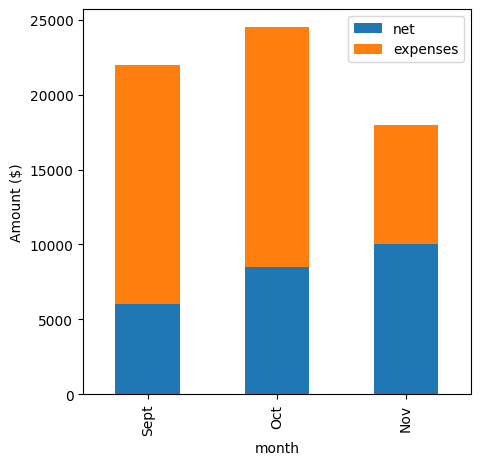

In [29]:
fig, ax = plt.subplots(1,1, figsize = (5,5))

earnings_df.plot(
    x='month',
    y=['net', 'expenses'],
    kind='bar',
    stacked=True,
    ax = ax
)

ax.set_ylabel('Amount ($)')
plt.show()



### Importing and Inspecting Data

Most of the time, we'll be using data that exist outside of Python, either data that somebody else has collected or data that we've collected and saved to some other kind of file (.csv, .json, etc). We'll import data into the dataframe using:

```df = pd.read_csv(data.csv)```

Where ```data.csv``` could be a filepath on your computer or a url to a file that exists online. There are other commands that allow pandas to import a variety of data filetypes.

Once a file is imported, we can inspect the data using:

 - ```df.head(n)``` - Look at the first n rows (5 rows by default, if you omit n)
 - ```df.tail(n)``` - Look at the last n rows
 - ```df.describe()``` - Get information and statistics of the data
 - ```df.columns``` - Get a list of feature names

We'll import and inspect the Marvel Cinematic Universe (MCU) Movies & Series dataset, compiled by Stephen Tracy and published on Kaggle: https://www.kaggle.com/datasets/stevetracy/marvel-cinematic-universe-mcu-movies-and-series

In [30]:
mcu_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/datasets/refs/heads/main/mcu_data_apr_2024.csv')

In [31]:
mcu_df.columns

Index(['movie_title', 'Type', 'mcu_phase_number', 'mcu_phase_text',
       'release_date', 'release_year', 'rt_tomato_meter', 'rt_audience_score',
       'imdb-rating', 'metacritic_metascore', 'metacritic_userscore',
       ' production_budget ', ' domestic_box_office ',
       ' international_box_office ', ' worldwide_box_office '],
      dtype='object')

In [32]:
mcu_df.tail()

,movie_title,Type,mcu_phase_number,mcu_phase_text,release_date,release_year,rt_tomato_meter,rt_audience_score,imdb-rating,metacritic_metascore,metacritic_userscore,production_budget,domestic_box_office,international_box_office,worldwide_box_office
40,Secret Invasion,TV Show,5.0,MCU Phase 5,6/21/23,2023.0,53.0,46.0,5.9,63.0,3.5,"$211,000,000",-,-,-
41,The Marvels,Movie,5.0,MCU Phase 5,11/10/23,2023.0,62.0,82.0,5.6,50.0,3.8,"$270,000,000","$84,500,223","$121,612,709","$206,112,932"
42,Echo,TV Show,5.0,MCU Phase 5,1/9/24,2024.0,71.0,61.0,6.0,62.0,5.2,"$40,000,000",-,-,-
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$8,157,000,000","$11,799,499,952","$18,027,089,947","$29,826,145,377"


In [33]:
mcu_df.describe()

,mcu_phase_number,release_year,rt_tomato_meter,rt_audience_score,imdb-rating,metacritic_metascore,metacritic_userscore
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,3.162791,2018.023256,81.511628,81.906977,7.158140,67.093023,6.593023
std,1.233080,4.431964,13.017154,13.876692,0.753794,8.242786,1.493381
min,1.000000,2008.000000,46.000000,32.000000,5.300000,48.000000,2.700000
25%,2.000000,2015.000000,76.500000,78.000000,6.750000,62.500000,5.950000
50%,3.000000,2019.000000,85.000000,86.000000,7.300000,68.000000,6.900000
75%,4.000000,2021.500000,92.000000,91.000000,7.750000,72.000000,7.750000
max,5.000000,2024.000000,98.000000,98.000000,8.400000,88.000000,8.600000


Describe creates another dataframe and we can save this as a variable and interact with it.

## Dropping bad data

Data can be 'bad' for numerous reasons, but most immediately obvious are missing data. We drop missing data with ```df.dropna``` ([dropna documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html))

### Slicing dataframes

 - ```df.COLUMN_NAME``` or ```df[COLUMN_NAME]``` or ```df.loc[COLUMN_NAME]``` - slice an individual column

 - ```df[LIST_OF_COLUMN_NAMES]``` or ```df.loc[LIST_OF_COLUMN_NAME]```- slice multiple columns

 - ```df[ROW_INDICES]``` or ```df.iloc[ROW_INDICES]```- slice multiple rows

How does Pandas know whether you meant to slice a column or a row?

You can 'slice' columns or rows from a dataframe using:

 - ```df[LIST_OF_COLUMN_NAMES][ROW_INDICES]``` - slice along columns and rows


Let's get the movie_title, release_date, rt_audience_score, metacritic_userscore, production_budget, and worldwide_box_office for the last ten most recent entries (as of the time this list was made).


In [34]:
mcu_df[5:10]


,movie_title,Type,mcu_phase_number,mcu_phase_text,release_date,release_year,rt_tomato_meter,rt_audience_score,imdb-rating,metacritic_metascore,metacritic_userscore,production_budget,domestic_box_office,international_box_office,worldwide_box_office
5,The Avengers,Movie,1.0,MCU Phase 1,5/4/12,2012.0,91.0,91.0,8.0,69.0,8.0,"$220,000,000","$623,357,910","$895,442,000","$1,518,799,910"
6,Iron Man 3,Movie,2.0,MCU Phase 2,5/3/13,2013.0,79.0,78.0,7.1,62.0,6.7,"$200,000,000","$409,013,994","$806,426,000","$1,215,439,994"
7,Thor: The Dark World,Movie,2.0,MCU Phase 2,11/8/13,2013.0,66.0,75.0,6.8,54.0,7.0,"$170,000,000","$206,362,140","$438,421,000","$644,783,140"
8,Captain America: The Winter Soldier,Movie,2.0,MCU Phase 2,4/4/14,2014.0,90.0,92.0,7.7,70.0,8.3,"$170,000,000","$259,766,572","$454,654,931","$714,421,503"
9,Guardians of the Galaxy,Movie,2.0,MCU Phase 2,8/1/14,2014.0,92.0,92.0,8.0,76.0,8.2,"$170,000,000","$333,176,600","$439,697,800","$772,874,400"


### Adding a column

Just as in dictionaries, you can add a calculated column as you go.

### Filtering dataframes

You can also select rows of a dataframe that satisfy some condition (e.g. greater than some value, string starts with, before some date, value in a range, etc).

There are two main ways to filter dataframes based on conditions:

 - ```df[CONDITION]``` - the condition in terms of df.COLUMN_NAME
 - ```df.query['CONDITION']``` - the condition in terms of COLUMN_NAME

 The syntaxes of these two approaches are illustrated by an example.

*Example*: Find me the most liked of the MCU movies to watch. How will we define most liked?

### Practice Problems

 - Add a column that says what percentage of worldwide box office were made in the opening weekend (for each movie)?
 - Which movies were liked by audiences more than by the critics?
 - Find all the movies with Captain America in the title and tell me their metacritic scores.